# Практика по базовой математической статистике для Data scientist

# Практика 2 - поиск взаимоосвязей в данных

На практическом занятии научимся находять линейные связи между признаками при помощи python на датасете boston house prices

- анализ корреляций в датасете при помощи pandas
- визуализируем heatmap связей при помощи seaborn

Для начала импортируем все полезные библитеки и настроим ноутбук

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [3]:
# Загрузим датасет
boston = fetch_california_housing()

In [4]:
# Посмотрим его описание
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
# Загрузим фичи для анализа
df = pd.DataFrame(boston.data,columns = boston.feature_names)

In [6]:
# Добавим целевую переменную - цены на недвижимость
df["price"] = boston.target

In [7]:
# Переведем загловки столбцов в нижний регистр и посмотрим на данные
df.columns = map(str.lower, df.columns)
df.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Посмотрим на типы переменных и количество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   medinc      20640 non-null  float64
 1   houseage    20640 non-null  float64
 2   averooms    20640 non-null  float64
 3   avebedrms   20640 non-null  float64
 4   population  20640 non-null  float64
 5   aveoccup    20640 non-null  float64
 6   latitude    20640 non-null  float64
 7   longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Теперь мы готовы к исследованию взаимосвязей. Выберем факторы, которые хочется поисследовать из списка:

In [9]:
research_list = ["medinc", "houseage", "averooms", "avebedrms", "population", "aveoccup", "latitude", "longitude", "price"]

In [15]:
# Остсортируем только интересные нам колонки
df[research_list].head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Постром матрицу парных корреляций для отобранных данных при помощи метода corr() pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [11]:
corr_m = df[research_list].corr()

In [12]:
corr_m

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,price
medinc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
houseage,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
averooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
avebedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
aveoccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Теперь визуализируем полученную матрицу при помощи seaborn heatmap https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

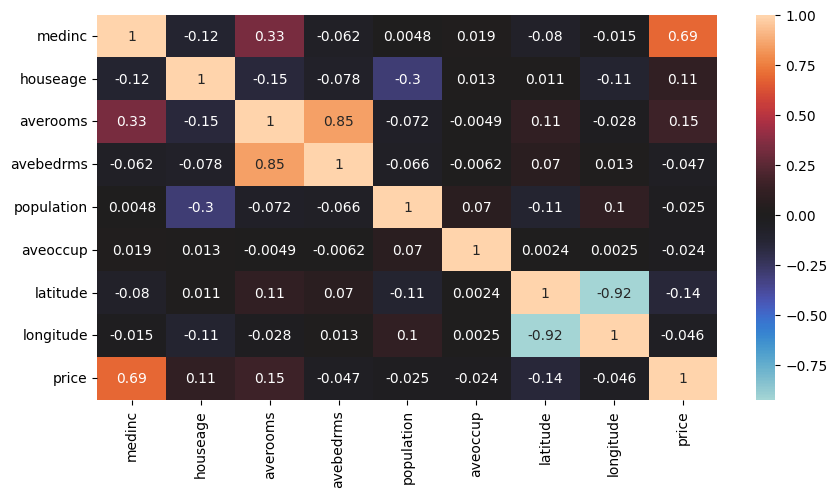

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_m, center=0, annot=True)

Видно, что есть сильные обратные и прямые связи. А теперь построим диаграмму рассеяния для каждой пары признаков со связями заметной значимости c показателем price.
Заметная значимость по шкале Чеддока - при коэффициенте корреляции от 0.5 по модулю и выше.

Для того чтобы не сравнивать цену с ценой, срезом уменьшаем выборку [:-1]

data    pandas.DataFrame, numpy.ndarray, mapping, or sequence
Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

x, yvectors or keys in data
Variables that specify positions on the x and y axes.

Коэффициент корреляции 0.6880752079585475


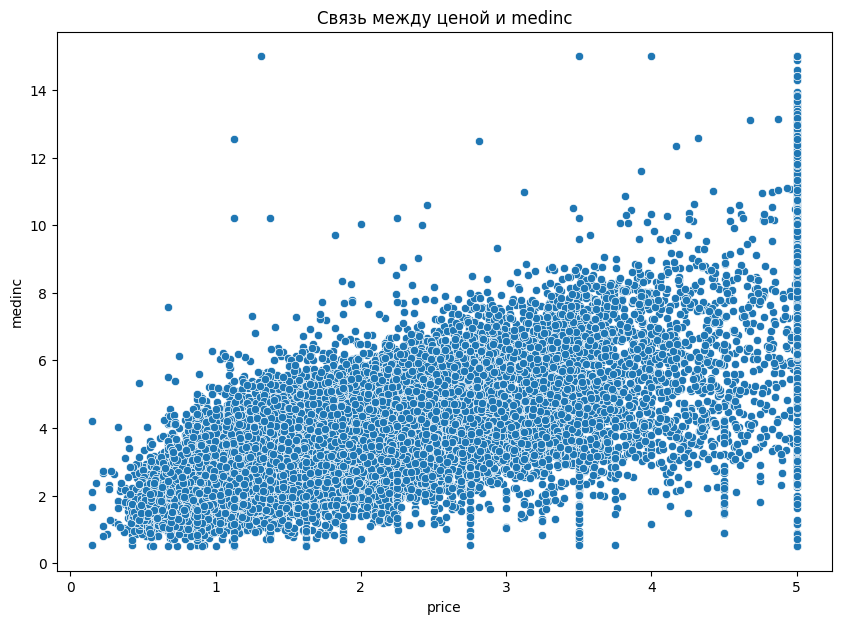

In [14]:
level = 0.5
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()

Как можем видеть, цена на дома прямо связана с количеством комнат и обратно пропорциональна доле населения с низкими доходами.

## Мини домашка

Постройте диаграмму рассеяния для каждой пары признаков со связями умеренной значимости с показателем price.
Умеренная связь по шкале Чеддока - коэффициент корреляции от 0.3 по модулю

Коэффициент корреляции 0.6880752079585475


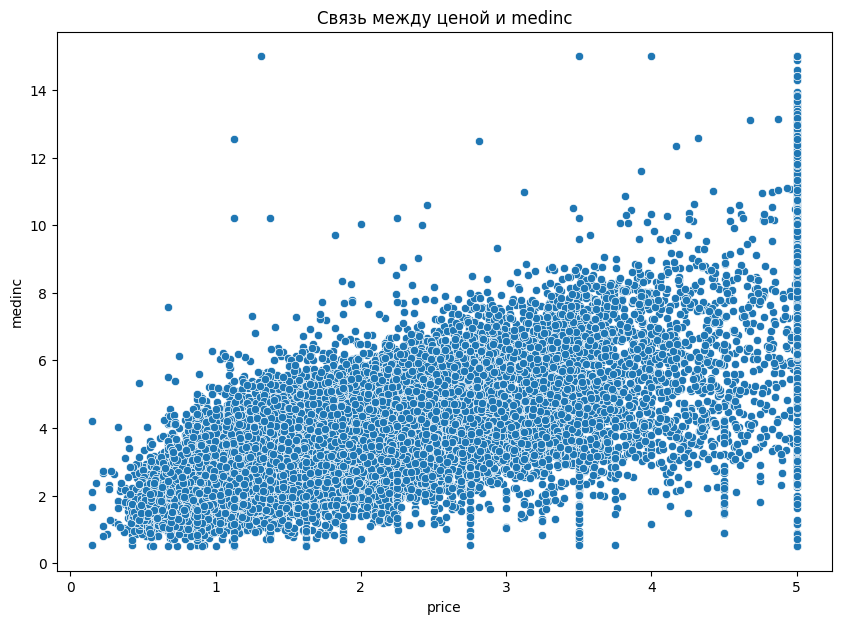

Коэффициент корреляции 0.15194828974145774


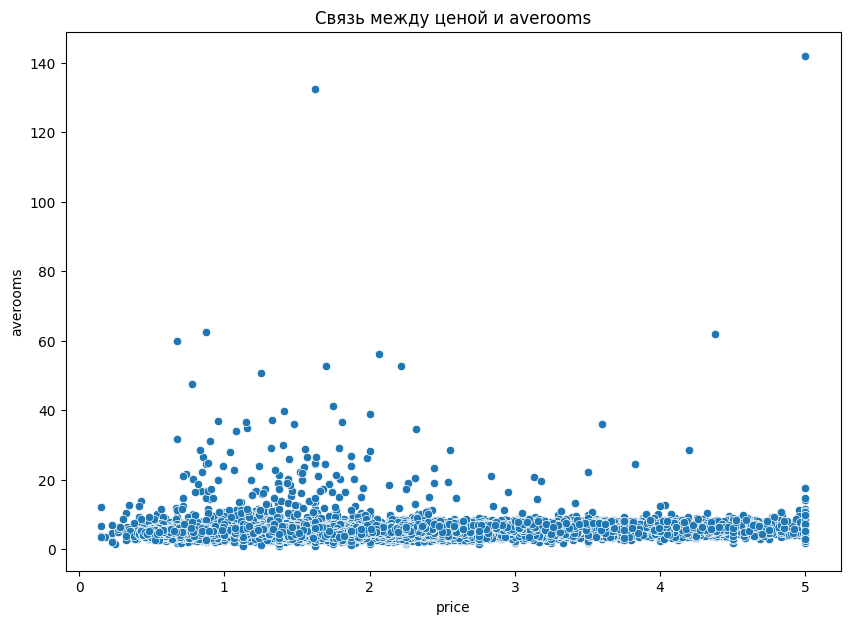

In [20]:
level = 0.15
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()